# JSON examples and exercise
****
+ get familiar with packages for dealing with JSON
+ study examples with JSON strings and files 
+ work on exercise to be completed and submitted 
****
+ reference: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
+ data source: http://jsonstudio.com/resources/
****

In [266]:
import pandas as pd

## imports for Python, Pandas

In [267]:
import json
from pandas.io.json import json_normalize

## JSON example, with string

+ demonstrates creation of normalized dataframes (tables) from nested json string
+ source: http://pandas.pydata.org/pandas-docs/stable/io.html#normalization

In [268]:
# define json string
data = [{'state': 'Florida', 
         'shortname': 'FL',
         'info': {'governor': 'Rick Scott'},
         'counties': [{'name': 'Dade', 'population': 12345},
                      {'name': 'Broward', 'population': 40000},
                      {'name': 'Palm Beach', 'population': 60000}]},
        {'state': 'Ohio',
         'shortname': 'OH',
         'info': {'governor': 'John Kasich'},
         'counties': [{'name': 'Summit', 'population': 1234},
                      {'name': 'Cuyahoga', 'population': 1337}]}]

In [269]:
# use normalization to create tables from nested element
json_normalize(data, 'counties')

,name,population
0,Dade,12345
1,Broward,40000
2,Palm Beach,60000
3,Summit,1234
4,Cuyahoga,1337


In [270]:
# further populate tables created from nested element
json_normalize(data, 'counties', ['state', 'shortname', ['info', 'governor']])

,name,population,state,shortname,info.governor
0,Dade,12345,Florida,FL,Rick Scott
1,Broward,40000,Florida,FL,Rick Scott
2,Palm Beach,60000,Florida,FL,Rick Scott
3,Summit,1234,Ohio,OH,John Kasich
4,Cuyahoga,1337,Ohio,OH,John Kasich


****
## JSON example, with file

+ demonstrates reading in a json file as a string and as a table
+ uses small sample file containing data about projects funded by the World Bank 
+ data source: http://jsonstudio.com/resources/

In [271]:
# load json as string
json.load((open('data/world_bank_projects_less.json')))

[{'_id': {'$oid': '52b213b38594d8a2be17c780'},
  'approvalfy': 1999,
  'board_approval_month': 'November',
  'boardapprovaldate': '2013-11-12T00:00:00Z',
  'borrower': 'FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA',
  'closingdate': '2018-07-07T00:00:00Z',
  'country_namecode': 'Federal Democratic Republic of Ethiopia!$!ET',
  'countrycode': 'ET',
  'countryname': 'Federal Democratic Republic of Ethiopia',
  'countryshortname': 'Ethiopia',
  'docty': 'Project Information Document,Indigenous Peoples Plan,Project Information Document',
  'envassesmentcategorycode': 'C',
  'grantamt': 0,
  'ibrdcommamt': 0,
  'id': 'P129828',
  'idacommamt': 130000000,
  'impagency': 'MINISTRY OF EDUCATION',
  'lendinginstr': 'Investment Project Financing',
  'lendinginstrtype': 'IN',
  'lendprojectcost': 550000000,
  'majorsector_percent': [{'Name': 'Education', 'Percent': 46},
   {'Name': 'Education', 'Percent': 26},
   {'Name': 'Public Administration, Law, and Justice', 'Percent': 16},
   {'Name': 'Educatio

In [272]:
# load as Pandas dataframe
sample_json_df = pd.read_json('data/world_bank_projects_less.json')
sample_json_df

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Name': 'Education for all', 'Percent': 100}","[{'name': 'Education for all', 'code': '65'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Name': 'Other economic management', 'Percent...","[{'name': 'Other economic management', 'code':...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en


****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

## Question 1: Find the 10 countries with the most projects

** Approach Overview: **

I loaded the JSON data as a Pandas dataframe, checked the shape of the data frame and printed the column names. I set the index to the country names and selected only the column listing the projects. I sorted and grouped the dataframe by the country names and produced counts of the number of projects per country. I printed the top 10 countries and project counts. Finally, I created a bar chart to show the top 10 countries and their project counts.

In [273]:


#Load JSON data as a Pandas dataframe
df = pd.read_json('data/world_bank_projects.json')

#get number of rows and columns
print(df.shape)

(500, 50)


In [274]:
#Print column names
print(df.columns)

Index(['_id', 'approvalfy', 'board_approval_month', 'boardapprovaldate',
       'borrower', 'closingdate', 'country_namecode', 'countrycode',
       'countryname', 'countryshortname', 'docty', 'envassesmentcategorycode',
       'grantamt', 'ibrdcommamt', 'id', 'idacommamt', 'impagency',
       'lendinginstr', 'lendinginstrtype', 'lendprojectcost',
       'majorsector_percent', 'mjsector_namecode', 'mjtheme',
       'mjtheme_namecode', 'mjthemecode', 'prodline', 'prodlinetext',
       'productlinetype', 'project_abstract', 'project_name', 'projectdocs',
       'projectfinancialtype', 'projectstatusdisplay', 'regionname', 'sector',
       'sector1', 'sector2', 'sector3', 'sector4', 'sector_namecode',
       'sectorcode', 'source', 'status', 'supplementprojectflg', 'theme1',
       'theme_namecode', 'themecode', 'totalamt', 'totalcommamt', 'url'],
      dtype='object')


In [275]:
#Select column 'project_name' and assign to: df_project
df_project = df[['countryname','project_name']]

#Set index to country names
df_countryind = df_project.set_index('countryname')

#Print first 5 rows
print(df_countryind.head())

                                                                              project_name
countryname                                                                               
Federal Democratic Republic of Ethiopia  Ethiopia General Education Quality Improvement...
Republic of Tunisia                              TN: DTF Social Protection Reforms Support
Tuvalu                                   Tuvalu Aviation Investment Project - Additiona...
Republic of Yemen                         Gov't and Civil Society Organization Partnership
Kingdom of Lesotho                       Second Private Sector Competitiveness and Econ...


In [276]:
#Sort projects by country name and check that it is sorted
df_countrysort = df_countryind.sort_index()
print(df_countrysort.index.is_monotonic)

print(df_countrysort.head())

True
                                                  project_name
countryname                                                   
Africa       RCIP4 - Regional Communications Infrastructure...
Africa       Additional Financing-West Africa Agricultural ...
Africa       Agricultural Productivity Program for Southern...
Africa       Building Resilience through Innovation, Commun...
Africa       Southern Africa Trade and Transport Facilitati...


In [277]:
#Check for missing values
print(df_countrysort.isnull().sum())

project_name    0
dtype: int64


In [278]:
#Create column of projects for counting: 'project_name_count'
df_countrysort['project_name_count'] = df_countrysort['project_name']

#Check that the column was created
print(df_countrysort.columns)

#Count the number of projects by country
df_projectcount = df_countrysort.groupby('countryname').count()


#Sort the top 10 countries by project count
df_topprojects = df_projectcount.nlargest(10, 'project_name_count')

print(df_topprojects['project_name_count'])


Index(['project_name', 'project_name_count'], dtype='object')
countryname
People's Republic of China         19
Republic of Indonesia              19
Socialist Republic of Vietnam      17
Republic of India                  16
Republic of Yemen                  13
Kingdom of Morocco                 12
Nepal                              12
People's Republic of Bangladesh    12
Africa                             11
Republic of Mozambique             11
Name: project_name_count, dtype: int64


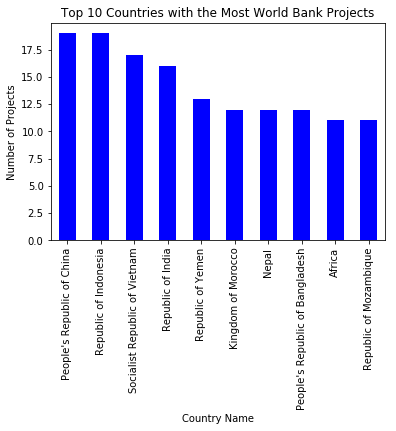

In [279]:
import matplotlib.pyplot as plt

#Creat bar chart of top 10 countries with highest number of projects
bar1= df_topprojects.plot.bar(use_index=True, y='project_name_count', legend=False, \
                        title='Top 10 Countries with the Most World Bank Projects',\
                        color='b')
bar1.set_xlabel("Country Name")
bar1.set_ylabel('Number of Projects')
plt.show()

## Question 2: Find the top 10 major project themes (using column 'mjtheme_namecode')

** Approach Overview: **

I loaded the JSON data as a string, which is a list of dictionaries. I checked that the number of dictionaries equals 500, which is the number of rows in the previous dataframe. I used normalization to create a table (pandas dataframe) from the nested dictionaries with only the 'mjtheme_namecode' dictionary. When I printed out the first 5 rows there was a missing name that was not filled in with a np.nan. This will make it difficult to count the top themes with meaning (i.e., I can count them by code but the result won't make sense without the name). I determined that instead of treating the missing values as np.nan, the normalization treated missing values as an empty string (''). I replaced all empty strings with np.nan.

I filled in the missing values by creating a dictionary with the 'code' column as a key and the 'name' column as a value. First I dropped all the missing value rows and the duplicate rows. This left me with 11 rows, which matched the 11 codes in the data.

Finally, as in question 1, I set the index to the names. I sorted and grouped the dataframe by the names and produced counts of the codes. I printed the top 10 names and code counts. Finally, I created a bar chart to show the top 10 project themes and their counts.

In [280]:
import numpy as np

# load json as string
data = json.load((open('data/world_bank_projects.json')))

#Check that number of dictionaries in data equals 500 (rows in dataframe)
print(len(data))

#Use normalization to create a table from the nested dictionaries
df_project_theme = json_normalize(data, 'mjtheme_namecode')
print(df_project_theme.head())

#Determine what are entered for missing values: ''
print((df_project_theme['name'][1] == ''))

#Replace missing '' with np.NaN to calculate
df_project_theme_nan = df_project_theme.replace('', np.NaN)

print(df_project_theme_nan.head(20))
print(df_project_theme_nan.isnull().sum())



500
  code                                   name
0    8                      Human development
1   11                                       
2    1                    Economic management
3    6  Social protection and risk management
4    5                  Trade and integration
True
   code                                          name
0     8                             Human development
1    11                                           NaN
2     1                           Economic management
3     6         Social protection and risk management
4     5                         Trade and integration
5     2                      Public sector governance
6    11  Environment and natural resources management
7     6         Social protection and risk management
8     7                   Social dev/gender/inclusion
9     7                   Social dev/gender/inclusion
10    5                         Trade and integration
11    4      Financial and private sector development
12    6      

In [281]:
#Create dictionary of project codes and names 
#Drop missing values and duplicates
df_project_theme_drop = df_project_theme_nan.dropna().drop_duplicates()

print(df_project_theme_drop.shape)

#Assign columns to dictionary keys and values

df_project_theme_dict = df_project_theme_drop.set_index('code').to_dict()['name']

#Fill in missing values with dictionary
df_project_theme_nan['name'] = df_project_theme_nan['name'].fillna(df_project_theme_nan['code'].apply(lambda x: df_project_theme_dict.get(x)))

#Change name to filled
df_filled = df_project_theme_nan

#Check that missing values filled correctly
print(df_filled.head(20))
print(df_filled.shape)
print(df_filled.isnull().sum())

(11, 2)
   code                                          name
0     8                             Human development
1    11  Environment and natural resources management
2     1                           Economic management
3     6         Social protection and risk management
4     5                         Trade and integration
5     2                      Public sector governance
6    11  Environment and natural resources management
7     6         Social protection and risk management
8     7                   Social dev/gender/inclusion
9     7                   Social dev/gender/inclusion
10    5                         Trade and integration
11    4      Financial and private sector development
12    6         Social protection and risk management
13    6         Social protection and risk management
14    2                      Public sector governance
15    4      Financial and private sector development
16   11  Environment and natural resources management
17    8             

In [282]:
#Set index to 'name'
df_filled_ind = df_filled.set_index('name')


#Create column of codes for counting: 'code_count'
df_filled_ind['code_count'] = df_filled_ind['code']

#Check that the column was created and index is set to 'name'
print(df_filled_ind.columns)

#Count the number of projects by name
df_filled_count = df_filled_ind.groupby('name').count()


#Sort the top 10 countries by code
df_top_themes = df_filled_count.nlargest(10, 'code_count')

print(df_top_themes['code_count'])

Index(['code', 'code_count'], dtype='object')
name
Environment and natural resources management    250
Rural development                               216
Human development                               210
Public sector governance                        199
Social protection and risk management           168
Financial and private sector development        146
Social dev/gender/inclusion                     130
Trade and integration                            77
Urban development                                50
Economic management                              38
Name: code_count, dtype: int64


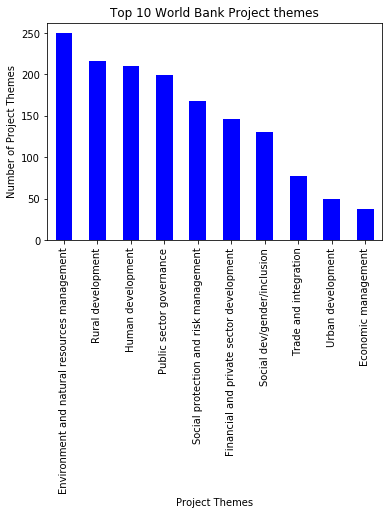

In [283]:
#Creat bar chart of top 10 World Bank project themes
bar2= df_top_themes.plot.bar(use_index=True, y='code_count', legend=False, \
                        title='Top 10 World Bank Project themes',\
                        color='b')
bar2.set_xlabel("Project Themes")
bar2.set_ylabel('Number of Project Themes')
plt.show()

## Question 3: In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

** Approach Overview: **

I did this while answering question 2. The dataframe with filled values is printed below.

When I printed out the first 5 rows there was a missing name that was not filled in with a np.nan. This will make it difficult to count the top themes with meaning (i.e., I can count them by code but the result won't make sense without the name). I determined that instead of treating the missing values as np.nan, the normalization treated missing values as an empty string (''). I replaced all empty strings with np.nan.

I filled in the missing values by creating a dictionary with the 'code' column as a key and the 'name' column as a value. First I dropped all the missing value rows and the duplicate rows. This left me with 11 rows, which matched the 11 codes in the data.



In [284]:
print(df_filled.head(20))
print('')
print(df_filled.tail(20))

   code                                          name
0     8                             Human development
1    11  Environment and natural resources management
2     1                           Economic management
3     6         Social protection and risk management
4     5                         Trade and integration
5     2                      Public sector governance
6    11  Environment and natural resources management
7     6         Social protection and risk management
8     7                   Social dev/gender/inclusion
9     7                   Social dev/gender/inclusion
10    5                         Trade and integration
11    4      Financial and private sector development
12    6         Social protection and risk management
13    6         Social protection and risk management
14    2                      Public sector governance
15    4      Financial and private sector development
16   11  Environment and natural resources management
17    8                     